In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor

from tqdm import trange

In [135]:
reg = KNeighborsRegressor(n_neighbors=4, weights='distance')

In [136]:
aq_locations = pd.read_csv("data/London_AirQuality_Stations.csv", index_col=0)
aq_locations.head(2)

,api_data,need_prediction,historical_data,Latitude,Longitude,SiteType,SiteName
BX9,True,NaN,True,51.465983,0.184877,Suburban,Bexley - Slade Green FDMS
BX1,True,NaN,True,51.465983,0.184877,Suburban,Bexley - Slade Green


In [137]:
meo = pd.read_csv("data/London_historical_meo_grid.csv")
meo.head(2)

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,london_grid_000,-2.0,50.5,2017-01-01 00:00:00,9.36,1024.81,77.90,250.88,23.74
1,london_grid_001,-2.0,50.6,2017-01-01 00:00:00,9.09,1024.25,78.96,249.86,21.81


({'BX9': array([[51.5,  0.2],
         [51.4,  0.2],
         [51.5,  0.1],
         [51.4,  0.1]]),
  'BX1': array([[51.5,  0.2],
         [51.4,  0.2],
         [51.5,  0.1],
         [51.4,  0.1]]),
  'BL0': array([[51.5, -0.1],
         [51.5, -0.2],
         [51.6, -0.1],
         [51.6, -0.2]]),
  'CD9': array([[51.5, -0.1],
         [51.5, -0.2],
         [51.6, -0.1],
         [51.6, -0.2]]),
  'CD1': array([[51.5, -0.2],
         [51.6, -0.2],
         [51.5, -0.1],
         [51.6, -0.1]]),
  'CT2': array([[51.5, -0.1],
         [51.6, -0.1],
         [51.5, -0.2],
         [51.5,  0. ]]),
  'CT3': array([[51.5, -0.1],
         [51.5,  0. ],
         [51.6, -0.1],
         [51.4, -0.1]]),
  'CR8': array([[51.4, -0.1],
         [51.4, -0.2],
         [51.5, -0.1],
         [51.3, -0.1]]),
  'GN0': array([[51.5,  0.1],
         [51.5,  0. ],
         [51.4,  0.1],
         [51.6,  0.1]]),
  'GR4': array([[51.5,  0.1],
         [51.4,  0.1],
         [51.5,  0. ],
         [51.4,

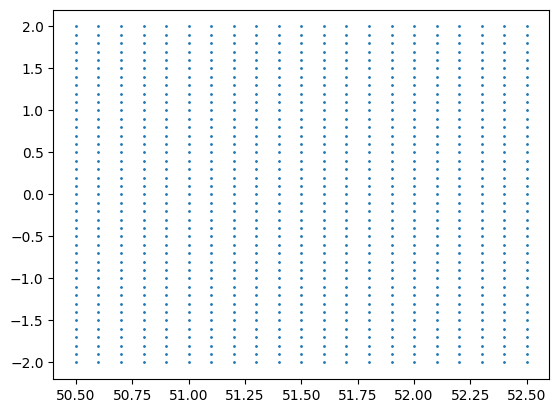

In [145]:
meo_new = deepcopy(meo)
meo_new = meo_new.set_index("utc_time")
meo_new.index = pd.to_datetime(meo_new.index)
meo_new = meo_new["2017-05-01":"2017-05-31"]

latlons = meo_new[["latitude", "longitude"]].drop_duplicates().values
plt.scatter(latlons[:, 0], latlons[:, 1], s=1)
aq_latlons = aq_locations[["Latitude", "Longitude"]]
# print(aq_latlons)

close_dict = {}
self_latlon = {}
for i in range(aq_latlons.shape[0]):
    name = aq_latlons.index[i]
    lat = aq_locations.iloc[i].Latitude
    lon = aq_locations.iloc[i].Longitude
    closest_idx = ((latlons[:, 0] - lat) ** 2 + (latlons[:, 1] - lon) ** 2).argsort()[:4]
    self_latlon[name] = (lat, lon)
    close_dict[name] = latlons[closest_idx]

close_dict, self_latlon

In [139]:
aq = pd.read_csv("data/London_historical_aqi_forecast_stations_20180331.csv", index_col=0)
aq.head()

,MeasurementDateGMT,station_id,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3)
0,2017/1/1 0:00,CD1,40.0,44.4,36.6
1,2017/1/1 1:00,CD1,31.6,34.4,46.2
2,2017/1/1 2:00,CD1,24.7,28.1,38.3
3,2017/1/1 3:00,CD1,21.2,24.5,32.8
4,2017/1/1 4:00,CD1,24.9,23.0,28.1


In [140]:
aq_new = aq.set_index("MeasurementDateGMT")
aq_new.index = pd.to_datetime(aq_new.index)
aq_new = aq_new["2017-05-01":"2017-05-31"]
aq_new

,station_id,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3)
MeasurementDateGMT,,,,
2017-05-01 00:00:00,CD1,8.4,6.1,25.7
2017-05-01 01:00:00,CD1,8.2,12.8,36.6
2017-05-01 02:00:00,CD1,10.7,10.4,34.1
2017-05-01 03:00:00,CD1,10.3,12.5,29.7
2017-05-01 04:00:00,CD1,6.3,10.1,31.4
...,...,...,...,...
2017-05-31 19:00:00,TH4,NaN,25.6,58.3
2017-05-31 20:00:00,TH4,NaN,21.8,55.7
2017-05-31 21:00:00,TH4,10.1,19.9,60.4


In [141]:
aq_others = pd.read_csv("data/London_historical_aqi_other_stations_20180331.csv")
aq_others.head(2)

/tmp/ipykernel_3274149/1172158178.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  aq_others = pd.read_csv("data/London_historical_aqi_other_stations_20180331.csv")


,Station_ID,MeasurementDateGMT,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),Unnamed: 5,Unnamed: 6
0,LH0,2017/1/1 0:00,30.2,34.6,15.9,NaN,NaN
1,LH0,2017/1/1 1:00,25.4,29.2,11.8,NaN,NaN


In [142]:
aq_others_new = aq_others.set_index("MeasurementDateGMT")
aq_others_new.index = pd.to_datetime(aq_others_new.index)
aq_others_new = aq_others_new["2017-05-01":"2017-05-31"]
aq_others_new.rename(columns={"Station_ID": "station_id"}, inplace=True)
# remove last two columns
aq_others_new = aq_others_new.iloc[:, :-2]
aq_others_new

,station_id,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3)
MeasurementDateGMT,,,,
2017-05-01 00:00:00,LH0,2.4,3.4,38.3
2017-05-01 01:00:00,LH0,3.2,5.4,9.2
2017-05-01 02:00:00,LH0,3.6,6.1,8.9
2017-05-01 03:00:00,LH0,4.0,7.1,11.6
2017-05-01 04:00:00,LH0,4.3,6.5,13.3
...,...,...,...,...
2017-05-31 19:00:00,CT2,12.0,NaN,NaN
2017-05-31 20:00:00,CT2,15.0,NaN,NaN
2017-05-31 21:00:00,CT2,11.0,NaN,NaN


In [177]:
reg.fit([[0, 1], [2, 4], [5, 6], [4, 5]], [[1, 2], [5, 6], [3, 4], [2, 3]])
reg.predict([[1, 3]]).shape

(1, 2)

In [143]:
aq = pd.concat([aq_new, aq_others_new])
aq

aq["delta_t"] = (aq.index - aq.index[0]).total_seconds()/3600
aq

,station_id,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),delta_t
MeasurementDateGMT,,,,,
2017-05-01 00:00:00,CD1,8.4,6.1,25.7,0.0
2017-05-01 01:00:00,CD1,8.2,12.8,36.6,1.0
2017-05-01 02:00:00,CD1,10.7,10.4,34.1,2.0
2017-05-01 03:00:00,CD1,10.3,12.5,29.7,3.0
2017-05-01 04:00:00,CD1,6.3,10.1,31.4,4.0
...,...,...,...,...,...
2017-05-31 19:00:00,CT2,12.0,NaN,NaN,739.0
2017-05-31 20:00:00,CT2,15.0,NaN,NaN,740.0
2017-05-31 21:00:00,CT2,11.0,NaN,NaN,741.0


In [146]:
aq["latitude"] = aq.station_id.apply(lambda x: self_latlon[x][0])
aq["longitude"] = aq.station_id.apply(lambda x: self_latlon[x][1])
aq

,station_id,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),delta_t,latitude,longitude
MeasurementDateGMT,,,,,,,
2017-05-01 00:00:00,CD1,8.4,6.1,25.7,0.0,51.544219,-0.175284
2017-05-01 01:00:00,CD1,8.2,12.8,36.6,1.0,51.544219,-0.175284
2017-05-01 02:00:00,CD1,10.7,10.4,34.1,2.0,51.544219,-0.175284
2017-05-01 03:00:00,CD1,10.3,12.5,29.7,3.0,51.544219,-0.175284
2017-05-01 04:00:00,CD1,6.3,10.1,31.4,4.0,51.544219,-0.175284
...,...,...,...,...,...,...,...
2017-05-31 19:00:00,CT2,12.0,NaN,NaN,739.0,51.514525,-0.104516
2017-05-31 20:00:00,CT2,15.0,NaN,NaN,740.0,51.514525,-0.104516
2017-05-31 21:00:00,CT2,11.0,NaN,NaN,741.0,51.514525,-0.104516


In [164]:
close_dict["CD1"]

array([[51.5, -0.2],
       [51.6, -0.2],
       [51.5, -0.1],
       [51.6, -0.1]])

In [198]:
features = ["temperature", "pressure", "humidity", "wind_direction", "wind_speed/kph"]

combo_idx_aq = aq.reset_index().set_index(["station_id", "MeasurementDateGMT"])

# print(combo_idx_aq.head())

from tqdm import tqdm

for t_idx in tqdm(aq.index):
    tmp_df = aq.loc[t_idx]
    tmp_meo = meo_new.loc[t_idx]
    reg.fit(tmp_meo[["latitude", "longitude"]].values, tmp_meo[features].values)
    for station in tmp_df.station_id:
        values = reg.predict([[self_latlon[station][0], self_latlon[station][1]]])
        for f, v in zip(features, values[0]):
            combo_idx_aq.loc[(station, t_idx), f] = v

print(combo_idx_aq.head(2))
print()

100%|██████████| 17856/17856 [08:22<00:00, 35.51it/s]

                                PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)  \
station_id MeasurementDateGMT                                              
CD1        2017-05-01 00:00:00            8.4         51.55         9.43   
           2017-05-01 01:00:00            8.2         12.80        36.60   

                                delta_t   latitude   longitude  \
station_id MeasurementDateGMT                                    
CD1        2017-05-01 00:00:00  994.245  96.655000  144.982500   
           2017-05-01 01:00:00    1.000  51.544219   -0.175284   

                                         special  temperature    pressure  \
station_id MeasurementDateGMT                                               
CD1        2017-05-01 00:00:00           11.9875     9.422356  994.272199   
           2017-05-01 01:00:00  (CD1, -0.175284)     9.085330  994.466844   

                                 humidity  wind_direction  wind_speed/kph  
station_id MeasurementDateGMT                

In [200]:
final_aq = combo_idx_aq.reset_index()
final_aq.head(5)

,station_id,MeasurementDateGMT,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),delta_t,latitude,longitude,special,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,CD1,2017-05-01 00:00:00,8.4,51.55,9.43,994.245,96.655000,144.982500,11.9875,9.422356,994.272199,96.645981,144.657621,11.936406
1,CD1,2017-05-01 01:00:00,8.2,12.80,36.60,1.000,51.544219,-0.175284,"(CD1, -0.175284)",9.085330,994.466844,95.883675,139.795010,12.066792
2,CD1,2017-05-01 02:00:00,10.7,10.40,34.10,2.000,51.544219,-0.175284,"(CD1, -0.175284)",8.749862,994.660643,95.124049,135.089973,12.282833
3,CD1,2017-05-01 03:00:00,10.3,12.50,29.70,3.000,51.544219,-0.175284,"(CD1, -0.175284)",8.408191,994.856844,94.360187,130.586040,12.577041
4,CD1,2017-05-01 04:00:00,6.3,10.10,31.40,4.000,51.544219,-0.175284,"(CD1, -0.175284)",8.261441,995.145426,93.120012,120.803522,13.380977


In [207]:
final_aq.loc[0, "delta_t"] = 0
final_aq.head(5)

,station_id,MeasurementDateGMT,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),delta_t,latitude,longitude,special,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,CD1,2017-05-01 00:00:00,8.4,51.55,9.43,0.0,96.655000,144.982500,11.9875,9.422356,994.272199,96.645981,144.657621,11.936406
1,CD1,2017-05-01 01:00:00,8.2,12.80,36.60,1.0,51.544219,-0.175284,"(CD1, -0.175284)",9.085330,994.466844,95.883675,139.795010,12.066792
2,CD1,2017-05-01 02:00:00,10.7,10.40,34.10,2.0,51.544219,-0.175284,"(CD1, -0.175284)",8.749862,994.660643,95.124049,135.089973,12.282833
3,CD1,2017-05-01 03:00:00,10.3,12.50,29.70,3.0,51.544219,-0.175284,"(CD1, -0.175284)",8.408191,994.856844,94.360187,130.586040,12.577041
4,CD1,2017-05-01 04:00:00,6.3,10.10,31.40,4.0,51.544219,-0.175284,"(CD1, -0.175284)",8.261441,995.145426,93.120012,120.803522,13.380977


In [208]:
# final_aq.drop("special").to_csv("data/london_aq_processed.csv", index=False)

In [213]:
final_aq["PM2.5 (ug/m3)"].isna().sum()/final_aq.shape[0]

0.09772625448028674

In [220]:
updated_df = final_aq.drop(final_aq.loc[final_aq['station_id'] == 'HR1'].index)
updated_df = updated_df.drop(updated_df.loc[updated_df['station_id'] == 'KF1'].index)

print(updated_df["PM2.5 (ug/m3)"].isna().sum()/updated_df.shape[0])

updated_df["PM2.5 (ug/m3)"] = updated_df["PM2.5 (ug/m3)"].interpolate(method="linear")
print(updated_df["PM2.5 (ug/m3)"].isna().sum()/updated_df.shape[0])

0.01570136852394917
0.0


In [221]:
updated_df.drop(columns=["special"]).to_csv("data/london_aq_processed.csv", index=False)

# After processing

In [2]:
processed_df = pd.read_csv("data/london_aq_processed.csv")
processed_df.head(5)

,station_id,MeasurementDateGMT,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),delta_t,latitude,longitude,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,CD1,2017-05-01 00:00:00,8.4,51.55,9.43,0.0,96.655000,144.982500,9.422356,994.272199,96.645981,144.657621,11.936406
1,CD1,2017-05-01 01:00:00,8.2,12.80,36.60,1.0,51.544219,-0.175284,9.085330,994.466844,95.883675,139.795010,12.066792
2,CD1,2017-05-01 02:00:00,10.7,10.40,34.10,2.0,51.544219,-0.175284,8.749862,994.660643,95.124049,135.089973,12.282833
3,CD1,2017-05-01 03:00:00,10.3,12.50,29.70,3.0,51.544219,-0.175284,8.408191,994.856844,94.360187,130.586040,12.577041
4,CD1,2017-05-01 04:00:00,6.3,10.10,31.40,4.0,51.544219,-0.175284,8.261441,995.145426,93.120012,120.803522,13.380977


In [3]:
from sklearn.model_selection import KFold

In [4]:
processed_df = processed_df.rename(columns={"PM2.5 (ug/m3)": "PM2.5", "wind_speed/kph": "wind_speed"})

In [5]:
all_stations = processed_df.station_id.unique()
for f_id, (train_stations, test_stations) in enumerate(KFold(n_splits=4, shuffle=True, random_state=42).split(all_stations)):
    train_stations = all_stations[train_stations]
    test_stations = all_stations[test_stations]
    train_df = processed_df.loc[processed_df.station_id.isin(train_stations)]
    test_df = processed_df.loc[processed_df.station_id.isin(test_stations)]
    train_df.to_csv(f"data/fold{f_id}_london_aq_train.csv", index=False)
    test_df.to_csv(f"data/fold{f_id}_london_aq_test.csv", index=False)
    print(train_df.shape, test_df.shape, train_stations)

(11904, 13) (4464, 13) ['GR4' 'MY7' 'HV1' 'GR9' 'LW2' 'CD9' 'ST5' 'TH4' 'LH0' 'CT3' 'CR8' 'RB7'
 'BX1' 'BX9' 'KC1' 'CT2']
(11904, 13) (4464, 13) ['CD1' 'BL0' 'GR4' 'GN3' 'GR9' 'LW2' 'GN0' 'CD9' 'ST5' 'TD5' 'CT3' 'GB0'
 'CR8' 'BX1' 'BX9' 'CT2']
(12648, 13) (3720, 13) ['CD1' 'BL0' 'MY7' 'HV1' 'GN3' 'GR9' 'LW2' 'GN0' 'ST5' 'TH4' 'LH0' 'TD5'
 'CT3' 'GB0' 'RB7' 'BX9' 'KC1']
(12648, 13) (3720, 13) ['CD1' 'BL0' 'GR4' 'MY7' 'HV1' 'GN3' 'GN0' 'CD9' 'TH4' 'LH0' 'TD5' 'GB0'
 'CR8' 'RB7' 'BX1' 'KC1' 'CT2']
